In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
df = pd.read_excel('example/default of credit card clients.xls', index_col=0, header=1)  

print('The shape of the training dataset is:', df.shape)

The shape of the training dataset is: (30000, 24)


In [3]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,female,university,single,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,female,university,single,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,female,university,married,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,male,university,married,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   LIMIT_BAL                   30000 non-null  int64 
 1   SEX                         30000 non-null  object
 2   EDUCATION                   29669 non-null  object
 3   MARRIAGE                    29677 non-null  object
 4   AGE                         30000 non-null  int64 
 5   PAY_0                       30000 non-null  int64 
 6   PAY_2                       30000 non-null  int64 
 7   PAY_3                       30000 non-null  int64 
 8   PAY_4                       30000 non-null  int64 
 9   PAY_5                       30000 non-null  int64 
 10  PAY_6                       30000 non-null  int64 
 11  BILL_AMT1                   30000 non-null  int64 
 12  BILL_AMT2                   30000 non-null  int64 
 13  BILL_AMT3                   30000 non-null  in

In [11]:
df['MARRIAGE'] = df['MARRIAGE'].astype(str)
df['EDUCATION'] = df['EDUCATION'].astype(str)
df['SEX'] = df['SEX'].astype(str)

In [12]:
df['SEX'].value_counts() , df['MARRIAGE'].value_counts(), df['EDUCATION'].value_counts()

(female    18112
 male      11888
 Name: SEX, dtype: int64,
 single     15964
 married    13659
 nan          323
 0             54
 Name: MARRIAGE, dtype: int64,
 university         14030
 graduate school    10585
 high school         4916
 nan                  331
 others               124
 0                     14
 Name: EDUCATION, dtype: int64)

In [15]:
#First let's fill in the nulls
e_m = df['EDUCATION'].mode()

fil = (df.EDUCATION == 'nan')
df.loc[fil, 'EDUCATION'] = e_m

fil = (df.EDUCATION == '0')
df.loc[fil, 'EDUCATION'] = 'others'

In [16]:
df['EDUCATION'].value_counts()

university         14030
graduate school    10585
high school         4916
others               138
Name: EDUCATION, dtype: int64

In [17]:
m_m = df['MARRIAGE'].mode()

fil = (df.MARRIAGE == 'nan')
df.loc[fil, 'MARRIAGE'] = m_m
df['MARRIAGE'].value_counts()

single     15964
married    13659
0             54
Name: MARRIAGE, dtype: int64

In [18]:
df['SEX'].value_counts() , df['MARRIAGE'].value_counts(), df['EDUCATION'].value_counts()

(female    18112
 male      11888
 Name: SEX, dtype: int64,
 single     15964
 married    13659
 0             54
 Name: MARRIAGE, dtype: int64,
 university         14030
 graduate school    10585
 high school         4916
 others               138
 Name: EDUCATION, dtype: int64)

In [19]:
#LET'S hot-encode these categorical variables
categorical_columns = ['SEX', 'MARRIAGE', 'EDUCATION']

for c in categorical_columns:
    df[c] = df[c].astype('category') 

In [20]:
df['MARRIAGE'].value_counts()

single     15964
married    13659
0             54
Name: MARRIAGE, dtype: int64

In [21]:
data_dummies = pd.get_dummies(df[categorical_columns], drop_first=True) 
df_v2 = pd.concat([df, data_dummies], axis = 1)
df_v2.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_male,MARRIAGE_married,MARRIAGE_single,EDUCATION_high school,EDUCATION_others,EDUCATION_university
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,female,university,married,24,2,2,-1,-1,-2,...,0,0,0,1,0,1,0,0,0,1
2,120000,female,university,single,26,-1,2,0,0,0,...,1000,0,2000,1,0,0,1,0,0,1
3,90000,female,university,single,34,0,0,0,0,0,...,1000,1000,5000,0,0,0,1,0,0,1
4,50000,female,university,married,37,0,0,0,0,0,...,1100,1069,1000,0,0,1,0,0,0,1
5,50000,male,university,married,57,-1,0,-1,0,0,...,9000,689,679,0,1,1,0,0,0,1


In [22]:
df_v2.drop(categorical_columns,axis=1, inplace=True)
df_v2.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month,SEX_male,MARRIAGE_married,MARRIAGE_single,EDUCATION_high school,EDUCATION_others,EDUCATION_university
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,1,0,0,0,1
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1000,0,2000,1,0,0,1,0,0,1
3,90000,34,0,0,0,0,0,0,29239,14027,...,1000,1000,5000,0,0,0,1,0,0,1
4,50000,37,0,0,0,0,0,0,46990,48233,...,1100,1069,1000,0,0,1,0,0,0,1
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,9000,689,679,0,1,1,0,0,0,1


In [23]:
df_v2.shape

(30000, 27)

In [24]:
#LET'S FIX THE PAY_X 

fil = (df_v2.PAY_0 == -1) | (df_v2.PAY_0 == -2)
df_v2.loc[fil,'PAY_0'] = 0

fil = (df_v2.PAY_2 == -1) | (df_v2.PAY_2 == -2)
df_v2.loc[fil,'PAY_2'] = 0

fil = (df_v2.PAY_3 == -1) | (df_v2.PAY_3 == -2)
df_v2.loc[fil,'PAY_3'] = 0

fil = (df_v2.PAY_4 == -1) | (df_v2.PAY_4 == -2)
df_v2.loc[fil,'PAY_4'] = 0

fil = (df_v2.PAY_5 == -1) | (df_v2.PAY_5 == -2)
df_v2.loc[fil,'PAY_5'] = 0

fil = (df_v2.PAY_6 == -1) | (df_v2.PAY_6 == -2)
df_v2.loc[fil,'PAY_6'] = 0


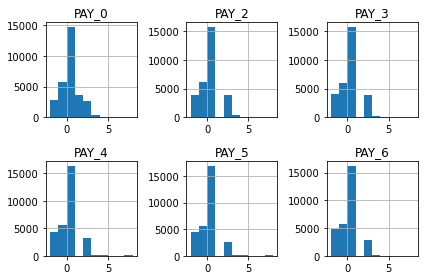

In [25]:
#STOLEN FUNCTION
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()
    
to_view = df[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
draw_histograms(to_view, to_view.columns, 2, 3, 10)

<AxesSubplot:>

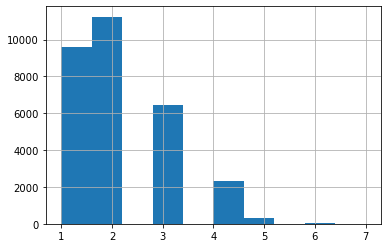

In [26]:
#let's try pinning AGE ! (I haven't tried that in the Kaggle dataset)

df_v2 ['AGE_BIN'] = 0
df_v2.loc[(df_v2.AGE <= 20), 'AGE_BIN'] = 0
df_v2.loc[((df_v2['AGE'] > 20) & (df['AGE'] < 30)) , 'AGE_BIN'] = 1
df_v2.loc[((df_v2['AGE'] >= 30) & (df['AGE'] < 40)) , 'AGE_BIN'] = 2
df_v2.loc[((df_v2['AGE'] >= 40) & (df['AGE'] < 50)) , 'AGE_BIN'] = 3
df_v2.loc[((df_v2['AGE'] >= 50) & (df['AGE'] < 60)) , 'AGE_BIN'] = 4
df_v2.loc[((df_v2['AGE'] >= 60) & (df['AGE'] < 70)) , 'AGE_BIN'] = 5
df_v2.loc[((df_v2['AGE'] >= 70) & (df['AGE'] < 81)) , 'AGE_BIN'] = 6
df_v2.loc[(df_v2.AGE >= 81), 'AGE_BIN'] = 7
df_v2.AGE_BIN.hist()

In [28]:
df_v2.drop(['AGE'], axis=1,inplace= True)

In [30]:
df_v2.shape

(30000, 27)

Text(0.5, 1.0, 'dataset correlation')

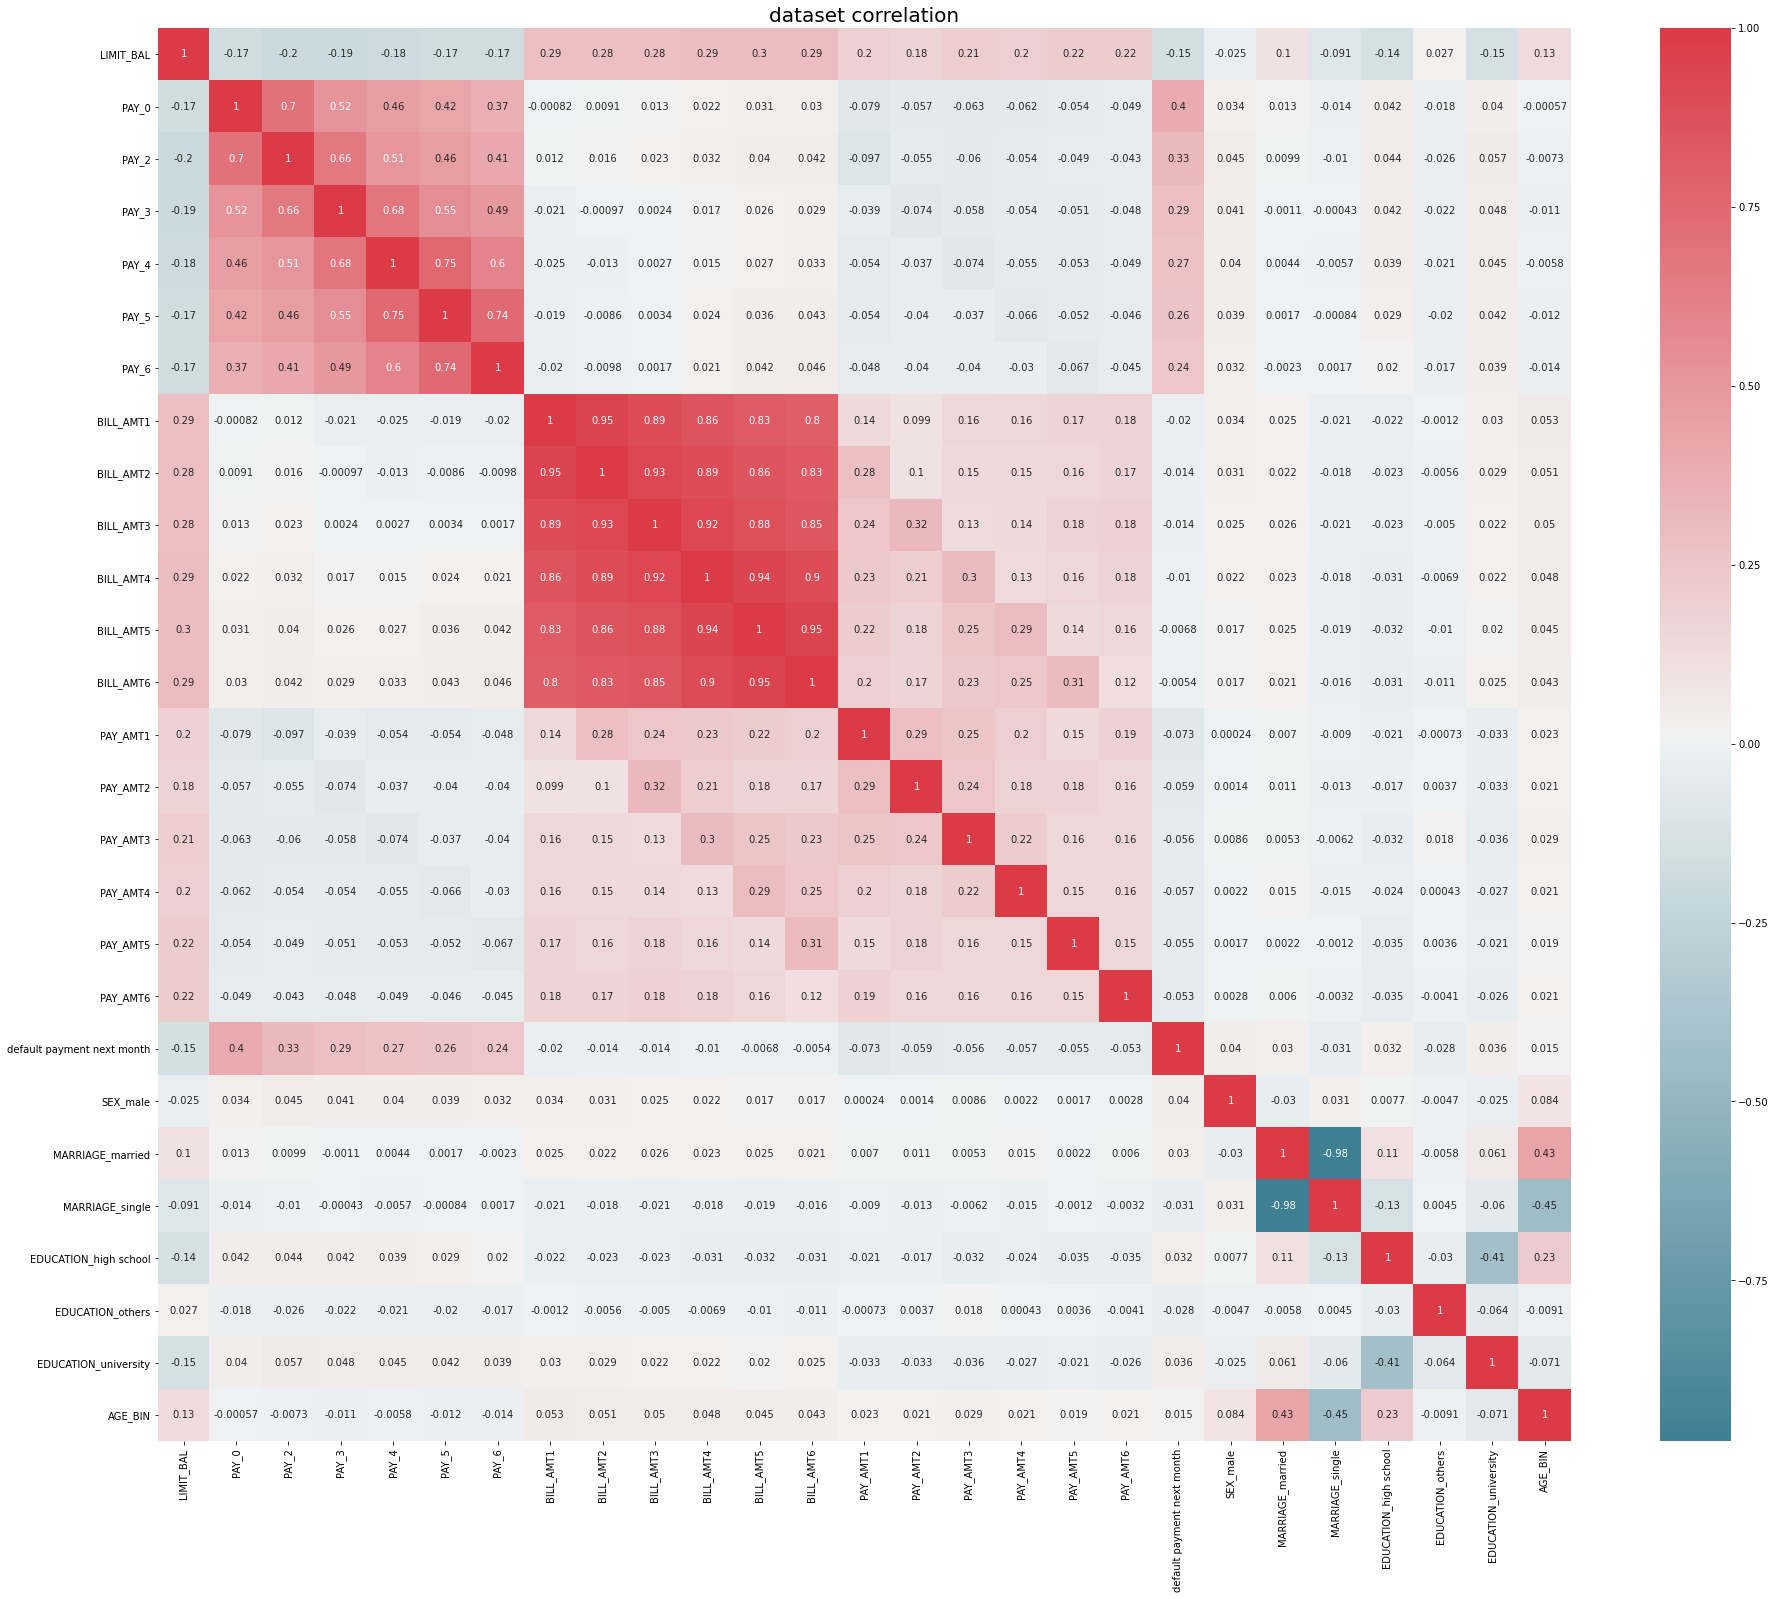

In [31]:
#time for correlation
import seaborn as sns

f, ax = plt.subplots(figsize=(32, 26))
corr = df_v2.corr()
mp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax, annot = True)
mp.set_title(label='dataset correlation', fontsize=20)

In [48]:
useful_columns = ['LIMIT_BAL','SEX_male',
                  'EDUCATION_high school','EDUCATION_others','EDUCATION_university',
                  'MARRIAGE_married','MARRIAGE_single','AGE_BIN',
                  'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                  'BILL_AMT1',
                  'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
                 ]
unuseful_columns = ['BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
label_colum = ['default.payment.next.month']  # very weird name i should change it to target

df_v2 = df_v2.rename(columns={'default payment next month': 'target'})
label_colum = ['target']

In [49]:
#drop the useless columns

df_v2.drop(unuseful_columns, axis=1, inplace=True)

KeyError: "['BILL_AMT2' 'BILL_AMT3' 'BILL_AMT4' 'BILL_AMT5' 'BILL_AMT6'] not found in axis"

In [50]:
#check for duplicates
(df_v2.drop_duplicates(inplace=False)).shape
#TURNS out no duplicates

(29816, 22)

In [51]:
df_v2.drop_duplicates(inplace=True)

In [52]:
df_v2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29816 entries, 1 to 30000
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   LIMIT_BAL              29816 non-null  int64
 1   PAY_0                  29816 non-null  int64
 2   PAY_2                  29816 non-null  int64
 3   PAY_3                  29816 non-null  int64
 4   PAY_4                  29816 non-null  int64
 5   PAY_5                  29816 non-null  int64
 6   PAY_6                  29816 non-null  int64
 7   BILL_AMT1              29816 non-null  int64
 8   PAY_AMT1               29816 non-null  int64
 9   PAY_AMT2               29816 non-null  int64
 10  PAY_AMT3               29816 non-null  int64
 11  PAY_AMT4               29816 non-null  int64
 12  PAY_AMT5               29816 non-null  int64
 13  PAY_AMT6               29816 non-null  int64
 14  target                 29816 non-null  int64
 15  SEX_male               29816 non-nul

In [53]:
# now is the time to balance the data
from imblearn.over_sampling import SMOTE 

X = df_v2.drop(['target'], axis=1).values
y = df_v2['target'].values # Enter your code here

sm = SMOTE(random_state=35)
X_res, y_res = sm.fit_resample(X, y)


/home/yomna/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Original Distribution of the dataset')

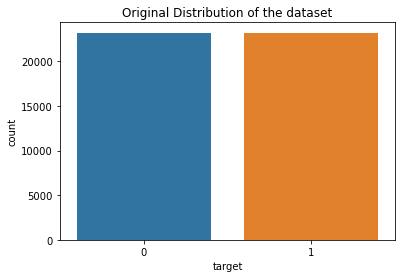

In [55]:
#Convert the new dataset to a Pandas DataFrame and check the shape and distribution of the data.
smote_df = pd.DataFrame(X_res, 
                        columns = df_v2.drop(['target'], axis=1).columns) 
smote_df['target'] = y_res 

sns.countplot(smote_df['target'])
plt.title('Original Distribution of the dataset')

In [56]:
smote_df.shape

(46444, 22)

In [57]:
smote_df.head()

,LIMIT_BAL,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,PAY_AMT1,PAY_AMT2,...,PAY_AMT5,PAY_AMT6,SEX_male,MARRIAGE_married,MARRIAGE_single,EDUCATION_high school,EDUCATION_others,EDUCATION_university,AGE_BIN,target
0,20000,2,2,0,0,0,0,3913,0,689,...,0,0,0,1,0,0,0,1,1,1
1,120000,0,2,0,0,0,2,2682,0,1000,...,0,2000,0,0,1,0,0,1,1,1
2,90000,0,0,0,0,0,0,29239,1518,1500,...,1000,5000,0,0,1,0,0,1,2,0
3,50000,0,0,0,0,0,0,46990,2000,2019,...,1069,1000,0,1,0,0,0,1,2,0
4,50000,0,0,0,0,0,0,8617,2000,36681,...,689,679,1,1,0,0,0,1,4,0


In [59]:
# time to try the training
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)
train_data, test_data = train_test_split(smote_df, test_size=0.2, shuffle=True, random_state=23)
val_data, test_data = train_test_split(test_data, test_size=0.2, shuffle=True, random_state=23)

X_train = train_data[['LIMIT_BAL','SEX_male',
                      'EDUCATION_high school','EDUCATION_others','EDUCATION_university',
                      'MARRIAGE_married','MARRIAGE_single','AGE_BIN',
                      'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                      'BILL_AMT1',
                      'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
                 ]]
y_train = train_data[['target']]

X_test = test_data[['LIMIT_BAL','SEX_male',
                      'EDUCATION_high school','EDUCATION_others','EDUCATION_university',
                      'MARRIAGE_married','MARRIAGE_single','AGE_BIN',
                      'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                      'BILL_AMT1',
                      'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
                 ]]
y_test = test_data[['target']]


X_val = test_data[['LIMIT_BAL','SEX_male',
                      'EDUCATION_high school','EDUCATION_others','EDUCATION_university',
                      'MARRIAGE_married','MARRIAGE_single','AGE_BIN',
                      'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6',
                      'BILL_AMT1',
                      'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'
                 ]]
y_val = test_data[['target']]



In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(max_depth=10, random_state=14) )
                    ])

# Fit the Pipeline to training data
pipeline.fit(X_train, y_train)

# Use the fitted pipeline to make predictions on the train dataset
train_predictions = pipeline.predict(X_train)

#this is for binary classification
print(confusion_matrix(y_train, train_predictions))
print(classification_report(y_train, train_predictions))
print("Accuracy (training):", accuracy_score(y_train, train_predictions))

[[16239  2396]
 [ 4272 14248]]
              precision    recall  f1-score   support

           0       0.79      0.87      0.83     18635
           1       0.86      0.77      0.81     18520

    accuracy                           0.82     37155
   macro avg       0.82      0.82      0.82     37155
weighted avg       0.82      0.82      0.82     37155

Accuracy (training): 0.8205355941326874


In [61]:
# Use the fitted pipeline to make predictions on the train dataset
val_predictions = pipeline.predict(X_val)

#this is for binary classification
print(confusion_matrix(y_val, val_predictions))
print(classification_report(y_val, val_predictions))
print("Accuracy (validation):", accuracy_score(y_val, val_predictions))


[[743 149]
 [237 729]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       892
           1       0.83      0.75      0.79       966

    accuracy                           0.79      1858
   macro avg       0.79      0.79      0.79      1858
weighted avg       0.80      0.79      0.79      1858

Accuracy (validation): 0.7922497308934338


In [62]:
# Use the fitted pipeline to make predictions on the test dataset
test_predictions = pipeline.predict(X_test)
print(confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))
print("Accuracy (test):", accuracy_score(y_test, test_predictions))


[[743 149]
 [237 729]]
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       892
           1       0.83      0.75      0.79       966

    accuracy                           0.79      1858
   macro avg       0.79      0.79      0.79      1858
weighted avg       0.80      0.79      0.79      1858

Accuracy (test): 0.7922497308934338
